<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/rls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/machine_learning/blob/main/1_Introduccion/rls.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Regresión Lineal Simple

La RLS, es la aproximación más simple al aprendizaje supervisado. En particular, la regresión lineal es una herramienta útil para predecir una respuesta cuantitativa.

Es un método que tiene muchos años y está presente en toda la bibliografía.

Aunque parezca super simple comparado con las técnicas modernas de machine learning, la regresión lineal aún es un método útil y ampliamente usado.

Principalmente, sirve como un buen punto de partida para aproximaciones más nuevas: muchas de las técnicas **fancy** pueden interpretarse como generalizaciones o extensiones de la regresión lineal.

Por lo tanto es súper importante tener una buena compresión de la regresión lineal antes de estudiar los algoritmos más complejos de machine learning.


## Dataset Advertising

Supongamos que que somos consultores estadísticos, y nos contratan con el objetivo de aumentar las ventas de un determinado producto.
El dataset Advertising consiste en las ventas del producto en 200 mercados, y el presupuesto dedicado en publicidad en 3 medios: TV, radio y diario.

Si logramos identificar una relación entre la inversión en publicidad y las ventas, podremos recomendarle a nuestro cliente hacia dónde debe dirigir su inversión en publicidad.

La variables predictoras serán los presupuestos para cada canal y la variable de respuesta será las ventas.

<u>Exploremos un poco los datos:</u>

###En el contexto de la visualización de datos con Python y la biblioteca Matplotlib, las "técnicas fancy" se refieren a métodos y herramientas que permiten crear gráficos más elaborados, personalizados y visualmente atractivos, más allá de los gráficos básicos. Estas técnicas buscan mejorar la presentación de la información, resaltar aspectos importantes y hacer que los gráficos sean más impactantes.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (20,5)  ## La línea completa plt.rcParams["figure.figsize"] = (20, 5) le dice a matplotlib: "A partir de ahora, quiero que todos mis gráficos tengan 20 pulgadas de ancho y 5 pulgadas de alto, a menos que especifique lo contrario".

In [2]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/machine_learning/1_Introduccion_y_regresion_lineal_simple/advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Veamos la relación entre las ventas y la publicidad en cada uno de los medios

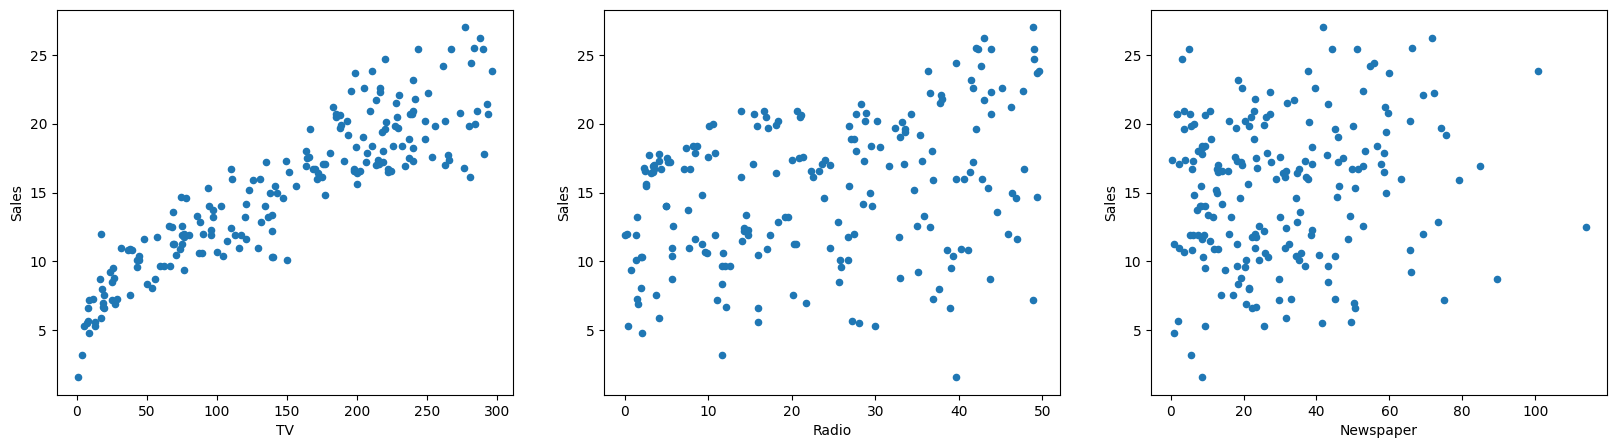

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
df.plot.scatter(x='TV', y='Sales', ax=ax1)
df.plot.scatter(x='Radio', y='Sales', ax=ax2)
df.plot.scatter(x='Newspaper', y='Sales', ax=ax3);

In [29]:
# prompt: ¿Hay alguna relación entre el presupuesto en publicidad y las ventas?

# Define the predictor variable (TV advertising budget) and the response variable (Sales).
X = df['TV']
y = df['Sales']

# Add a constant to the predictor variable (intercept).
X = sm.add_constant(X)

# Fit the linear regression model.
model = sm.OLS(y, X).fit()

# Print the model summary.
print(model.summary())

# Analyze the relationship.
print("\nRelationship between TV advertising budget and sales:")
if model.pvalues['TV'] < 0.05:  # Check for statistical significance
    print("There is a statistically significant relationship.")
    if model.params['TV'] > 0:
        print("As TV advertising budget increases, sales tend to increase.")
    else:
        print("As TV advertising budget increases, sales tend to decrease.")
else:
    print("There is no statistically significant relationship between TV advertising budget and sales.")


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           7.93e-74
Time:                        19:16:55   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [30]:
# prompt: ¿Qué tan fuerte es esa relación?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset.
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/machine_learning/1_Introduccion_y_regresion_lineal_simple/advertising.csv')

# Function to analyze the relationship between advertising budget and sales for a specific medium.
def analyze_relationship(medium):
    """
    Analyzes the relationship between advertising spend on a given medium and sales.

    Args:
        medium: The advertising medium (e.g., 'TV', 'Radio', 'Newspaper').
    """
    X = df[medium]
    y = df['Sales']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

    print(f"\nRelationship between {medium} advertising budget and sales:")
    if model.pvalues[medium] < 0.05:
        print("There is a statistically significant relationship.")
        if model.params[medium] > 0:
            print(f"As {medium} advertising budget increases, sales tend to increase.")
        else:
            print(f"As {medium} advertising budget increases, sales tend to decrease.")
    else:
        print(f"There is no statistically significant relationship between {medium} advertising budget and sales.")


# Analyze the relationship for each medium.
analyze_relationship('TV')
analyze_relationship('Radio')
analyze_relationship('Newspaper')


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           7.93e-74
Time:                        19:17:13   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [31]:
# prompt: ¿Cuáles de los medios mencionados contribuyen a las ventas?

# Analyze the relationship for each medium.
analyze_relationship('TV')
analyze_relationship('Radio')
analyze_relationship('Newspaper')


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           7.93e-74
Time:                        19:17:30   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [32]:
# prompt: ¿Con cuánta precisión podemos predecir las ventas futuras?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ... (rest of the code from the provided file)

# To assess prediction accuracy, you'd typically use metrics like R-squared, RMSE, or MAE.
# The R-squared value from the model summary indicates the proportion of variance in sales explained by the model.
# A higher R-squared suggests better predictive accuracy.

# Example: Accessing R-squared for the TV advertising model
print(f"\nR-squared for the TV advertising model: {model.rsquared}")

# You can also calculate RMSE or MAE for a more complete evaluation:

from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X) # Predictions
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Further considerations:

# 1. Model Assumptions: Linear regression makes assumptions (linearity, independence, normality, homoscedasticity). Violating these assumptions can affect accuracy.
# 2. Feature Engineering: Explore interactions between advertising mediums or other potential predictors.
# 3. Train-Test Split: Split the data into training and testing sets to evaluate performance on unseen data.
# 4. Cross-Validation: Use k-fold cross-validation for a more robust performance estimate.
# 5. More Complex Models: Consider more sophisticated models if linear regression doesn't provide satisfactory accuracy.

#  The accuracy of the model depends heavily on the data quality, the relationship between the variables, and the chosen evaluation metrics.



R-squared for the TV advertising model: 0.8121757029987414
RMSE: 2.2842381438447106
MAE: 1.8305872641932412


In [33]:
# prompt: ¿Es esta relación lineal?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset.
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/machine_learning/1_Introduccion_y_regresion_lineal_simple/advertising.csv')

# Function to analyze the relationship between advertising budget and sales for a specific medium.
def analyze_relationship(medium):
    """
    Analyzes the relationship between advertising spend on a given medium and sales.

    Args:
        medium: The advertising medium (e.g., 'TV', 'Radio', 'Newspaper').
    """
    X = df[medium]
    y = df['Sales']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

    print(f"\nRelationship between {medium} advertising budget and sales:")
    if model.pvalues[medium] < 0.05:
        print("There is a statistically significant relationship.")
        if model.params[medium] > 0:
            print(f"As {medium} advertising budget increases, sales tend to increase.")
        else:
            print(f"As {medium} advertising budget increases, sales tend to decrease.")
    else:
        print(f"There is no statistically significant relationship between {medium} advertising budget and sales.")

# Analyze the relationship for each medium.
analyze_relationship('TV')
analyze_relationship('Radio')
analyze_relationship('Newspaper')


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           7.93e-74
Time:                        19:18:15   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

Pensemos en estos datos. Algunas preguntas que podrían surgir:
<ul>
<li>¿Hay alguna relación entre el presupuesto en publicidad y las ventas?</li>
<li>¿Qué tan fuerte es esa relación?</li>
<li>¿Cuáles de los medios mencionados contribuyen a las ventas?</li>
<li>¿Con cuánta precisión podemos predecir las ventas futuras?</li>
<li>¿Es esta relación lineal?</li>
</ul>

Resulta que la regresión lineal puede ser usada para responder cada una de estas preguntas y algunas más.
Veamos algunos conceptos y luego intentaremos responderlas.

La regresión lineal simple intenta predecir una respuesta cuantitativa Y en base a una única variable predictora X.
Asume que hay aproximadamente una relación lineal entre X e Y.

Matemáticamente:  $$ Sales  \approx \hat {\beta}_{0} +  \hat {\beta}_{1} TV $$

𝛽0 y 𝛽1 son dos constantes que representan el intercepto y la pendiente en el modelo lineal.

Juntos, 𝛽0 y 𝛽1 son conocidos como los **parámetros del modelo**.

Una vez que hemos usado nuestro set de entrenamiento para producir los estimadores     y    para los coeficientes del modelo, podemos predecir futuras ventas en base a un valor particular de TV.

## ¿Cómo calculamos los parámetros del modelo?

Vamos a elegir el par 𝛽0 y 𝛽1 tales que minimizan la distancia entre la línea recta y los verdaderos valores que observamos:

<img src="https://i.ibb.co/8c2zbDy/mco.png" alt="Girl in a jacket" width="80%">

Ahora con Python:


##¿Hay alguna relación entre el presupuesto en publicidad y las ventas?
¿Qué tan fuerte es esa relación?
¿Cuáles de los medios mencionados contribuyen a las ventas?
¿Con cuánta precisión podemos predecir las ventas futuras?
¿Es esta relación lineal?

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
#Mi modelo será una instancia de la clase LinearRegression (¡Recuerden Programación Orientada a Objetos!)
model = LinearRegression(fit_intercept=True)

In [44]:
# Definimos la "X" y la "y" con las que vamos a entrenar nuestro modelo
X = df.loc[:,['TV']]  ## fancy indexing todas las filas solo la columna TV
y = df['Sales']  ## columna de ventas target

In [35]:
type(X)

pandas.core.frame.DataFrame

In [37]:
X.shape

(200, 1)

In [38]:
y.shape

(200,)

In [36]:
type(y)

pandas.core.series.Series

Noten que alrededor de tv hay dos corchetes, mientras que alrededor de Sales hay uno sólo.

Miren lo siguiente:

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [39]:
X.shape  ## X es una matriz con una unica columna

(200, 1)

In [11]:
y.shape

(200,)

En scikit learn las variables explicativas se expresan en un DataFrame y la variable explicada es siempre una serie.

In [45]:
#Los coeficientes (Betas) del modelo todavía no están definidos
# model.coef_ # Remove this line attempting to access coef_ before fitting

# ... (Your existing code to define X and y) ...

# Usamos el método fit para entrenar el modelo
model.fit(X,y) # Fit the model to the data

# Now you can access the coef_ attribute
print(model.coef_)

[0.05546477]


In [46]:
model.fit(X,y)  ## instanciamos el model

LinearRegression()

In [49]:
model.coef_  ## velocidad de crecimiento

array([0.05546477])

In [48]:
model.intercept_

6.974821488229891

<strong> ¿Cómo interpretamos estos coeficientes? </strong>

$ \hat {\beta}_{0} = 6.9748214882298925 $

Este coeficiente indica que cuando la publicidad en TV es de 0, de todas maneras las ventas son de 6.97 unidades.

$ \hat {\beta}_{1} = 0.05546477 $

Este coeficiente indica que cuando agregamos 1 unidad de publicidad en TV, las ventas aumentan en 0.05 unidades.


## Ejercicio

¿Cuántas ventas esperaríamos con una inversión en televisión de 4 unidades?

In [52]:
## Cuántas ventas esperaríamos con una inversión en televisión de 4 unidades?
model.predict([[4]])  ## metodo predict filas que quiero predecir objeto de 2 dimensiones

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.19668057])

In [51]:
ventas_estimadas = model.intercept_ + model.coef_ * 4
print(f"Las ventas estimadas son: {ventas_estimadas}")

Las ventas estimadas son: [7.19668057]


# Precisión de los coeficientes estimados

La matemática que soporta la regresión lineal simple, se basa en suponer que la variable explicativa (X) y la explicada (y) guardan una relación lineal perfecta perturbada por **ruido aleatoreo**: fenómenos que no podemos o no queremos explicar dentro del modelo y que no dependen de X.

Los fenómenos del mundo real nunca son exactamente así, pero vamos a encontrar que esta simplificación es útil en muchos casos para, por ejemplo, estudiar la relación entre X e y.

Lo bueno de Python es que podemos simular datos que sí cumplen estrictamente este supuesto de linealidad + ruido aleatoreo y observar qué pasa con las derviaciones estadísticas.

Supongamos que el precio de los departamentos de una ciudad es de 10000usd de base + usd2000/m2 más una perturbación aleatoria. Nuestra ciudad está compuesta por 1000 departamentos.

Vamos a simular esa población:

In [18]:
# Las superficies de los departamentos se distribuyen normalmente y
# tienen una media de 100 mts2 con un desvío estándar de 20mts2
superficies = np.random.normal(loc=100, scale=20, size=1000).astype(int)
print(superficies[0:30])

[ 99 108 104 103  92  84  98  83 111  84 104 128 100  63 117  67 103  77
 134 124 108  98 102 122 113  86 115 111 107  86]


In [19]:
# Los errores aleatorios tienen un promedio de $0 y un desvío estándar de usd3000
errores = np.random.normal(loc=0, scale=80000, size=1000).astype(int)
print(errores[0:30])

[  15738   18649   68762  -55513   28655 -114698  131339  160127 -110280
  -91398  115230 -114121  -56539 -128758    3230  -10421   57402   73510
   90279  128191  -32104   26528   57554  -14955   -7732  -41669 -103911
  103755   73121  163225]


In [20]:
# Generamos nuestra "población" de 1000 departamentos
precios_departamentos = (superficies * 2000 + 10000 + errores).astype(int)
print(precios_departamentos[0:30])

[223738 244649 286762 160487 222655  63302 337339 336127 121720  86602
 333230 151879 153461   7242 247230 133579 273402 237510 368279 386191
 193896 232528 271554 239045 228268 140331 136089 335755 297121 345225]


In [63]:
import warnings
warnings.filterwarnings('ignore')

Ahora supongamos que somos un grupo de relevadoras de precios y esa población es completamente desconocida para nosotras. Tenemos la posiblidad de tocar el timbre a algunos vecinos de la ciudad y preguntarles cuánto pagaron por su casa, pero esto nos cuesta tiempo y esfuerzo.

Nos preguntamos entonces:



* Dada una casa de 100mts2 ¿Cuál es su precio? ¿Cuánta confianza puedo tener en ese valor? ¿Y dada una casa de 500mts2?
* ¿Puedo afirmar con X% de confianza, que a mayor número de mts2 mayor precio?
* ¿Cuántas casas tenemos que conocer para poder estimar los precios con un X% de confianza?
* ¿Cuántas casas tenemos que conocer para entender cuánto influyen los mts2 en el precio con un X% de confianza?

Todas estas preguntas se pueden responder si suponemos que en nuestra población se cumplen los supuestos de la regresión lineal (vamos a entrar en detalle en la próxima clase) y aplicamos técnicas estadísticas.

In [64]:
# prompt: Dada una casa de 100mts2 ¿Cuál es su precio? ¿Cuánta confianza puedo tener en ese valor? ¿Y dada una casa de 500mts2?

# Assuming 'superficies' and 'precios_departamentos' are defined as in the original code.

import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a DataFrame from the simulated data
data = {'superficie': superficies, 'precio': precios_departamentos}
df_deptos = pd.DataFrame(data)

# Prepare the data for the model
X = df_deptos[['superficie']]
y = df_deptos['precio']

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Predict the price of a 100m² apartment
precio_100 = model.predict([[100]])
print(f"Precio estimado para un departamento de 100m²: {precio_100[0]}")


# Predict the price of a 500m² apartment
precio_500 = model.predict([[500]])
print(f"Precio estimado para un departamento de 500m²: {precio_500[0]}")

# Confidence in the estimations
# The confidence in the predictions depends on several factors, primarily:
# 1. The R-squared value of the model, indicating how well the model fits the data.
# 2. The number of data points used to train the model.
# 3. The variance of the error term (residuals) in the model.

# A higher R-squared and a larger dataset generally increase confidence.
# Confidence intervals around the predictions can provide a more precise measure of uncertainty.

# Demonstrating confidence interval calculation (basic example, more robust methods exist)
from scipy import stats
n = len(df_deptos)
t_value = stats.t.ppf(0.975, n - 2) #95% confidence interval
residual_std = np.std(y - model.predict(X))
confidence_100 = t_value * residual_std / np.sqrt(n)
print(f"Confidence Interval (100m²) ~ {precio_100[0] - confidence_100} - {precio_100[0] + confidence_100}")

confidence_500 = t_value * residual_std / np.sqrt(n)
print(f"Confidence Interval (500m²) ~ {precio_500[0] - confidence_500} - {precio_500[0] + confidence_500}")

# To get more precise confidence intervals, you should use statsmodels library.
# To understand the influence of m² on price with more confidence, consider more metrics like p-values, etc.

# Note: This is a simplified example. Real-world scenarios may involve more complex models and more sophisticated techniques for assessing confidence intervals and statistical significance.


Precio estimado para un departamento de 100m²: 212988.84117654292
Precio estimado para un departamento de 500m²: 998421.9949414147
Confidence Interval (100m²) ~ 207991.54416029082 - 217986.138192795
Confidence Interval (500m²) ~ 993424.6979251626 - 1003419.2919576667


In [65]:
# prompt: ¿Puedo afirmar con X% de confianza, que a mayor número de mts2 mayor precio?

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

# Assuming 'superficies' and 'precios_departamentos' are defined as in the original code.
superficies = np.random.normal(loc=100, scale=20, size=1000).astype(int)
errores = np.random.normal(loc=0, scale=80000, size=1000).astype(int)
precios_departamentos = (superficies * 2000 + 10000 + errores).astype(int)

# Create a DataFrame from the simulated data
data = {'superficie': superficies, 'precio': precios_departamentos}
df_deptos = pd.DataFrame(data)

# Prepare the data for the model
X = df_deptos[['superficie']]
y = df_deptos['precio']

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Analyze the relationship and calculate confidence
n = len(df_deptos)
t_value = stats.t.ppf(0.975, n - 2)  # 95% confidence interval
residual_std = np.std(y - model.predict(X))

# Calculate p-value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_deptos['superficie'], df_deptos['precio'])

print(f"P-value: {p_value}")

if p_value < 0.05:
  confidence_level = 95
  print(f"Puedo afirmar con un {confidence_level}% de confianza que a mayor número de m² mayor precio.")
else:
  print("No se puede afirmar con un nivel de confianza estadísticamente significativo que a mayor número de m² mayor precio.")


P-value: 1.3212518175507087e-57
Puedo afirmar con un 95% de confianza que a mayor número de m² mayor precio.


In [66]:
# prompt: ¿Cuántas casas tenemos que conocer para poder estimar los precios con un X% de confianza?

# ... (Your existing code) ...

# Number of houses needed for a desired confidence level
# This is a complex question that depends on the desired confidence level, the variability in the data, and the effect size (the relationship between square meters and price).

# Simulate a scenario to see how sample size affects p-values
confidence_level = 0.95

for sample_size in [10, 20, 50, 100, 200, 500]:  # Vary the sample size

    sample = df_deptos.sample(n=sample_size)
    slope, intercept, r_value, p_value, std_err = stats.linregress(sample['superficie'], sample['precio'])
    print(f"Sample size = {sample_size}, P-value = {p_value:.3f}")
    if p_value < 0.05:
        print(f"With a sample size of {sample_size}, can affirm that there's a statistically significant relationship.")
    else:
        print(f"With a sample size of {sample_size}, the relationship is NOT statistically significant.")
    print("-" * 20)

# In a real scenario, you'd use statistical power analysis to determine the required sample size for a given desired power and effect size.
# Power analysis allows you to calculate the minimum sample size needed to detect a specific effect with a given level of confidence.


Sample size = 10, P-value = 0.197
With a sample size of 10, the relationship is NOT statistically significant.
--------------------
Sample size = 20, P-value = 0.025
With a sample size of 20, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 50, P-value = 0.013
With a sample size of 50, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 100, P-value = 0.000
With a sample size of 100, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 200, P-value = 0.000
With a sample size of 200, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 500, P-value = 0.000
With a sample size of 500, can affirm that there's a statistically significant relationship.
--------------------


In [67]:
# prompt: ¿Cuántas casas tenemos que conocer para entender cuánto influyen los mts2 en el precio con un X% de confianza?

# ... (Your existing code) ...

# Number of houses needed for a desired confidence level
# This is a complex question that depends on the desired confidence level, the variability in the data, and the effect size (the relationship between square meters and price).

# Simulate a scenario to see how sample size affects p-values
confidence_level = 0.95

for sample_size in [10, 20, 50, 100, 200, 500]:  # Vary the sample size

    sample = df_deptos.sample(n=sample_size)
    slope, intercept, r_value, p_value, std_err = stats.linregress(sample['superficie'], sample['precio'])
    print(f"Sample size = {sample_size}, P-value = {p_value:.3f}")
    if p_value < 0.05:
        print(f"With a sample size of {sample_size}, can affirm that there's a statistically significant relationship.")
    else:
        print(f"With a sample size of {sample_size}, the relationship is NOT statistically significant.")
    print("-" * 20)

# In a real scenario, you'd use statistical power analysis to determine the required sample size for a given desired power and effect size.
# Power analysis allows you to calculate the minimum sample size needed to detect a specific effect with a given level of confidence.


Sample size = 10, P-value = 0.223
With a sample size of 10, the relationship is NOT statistically significant.
--------------------
Sample size = 20, P-value = 0.039
With a sample size of 20, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 50, P-value = 0.011
With a sample size of 50, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 100, P-value = 0.000
With a sample size of 100, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 200, P-value = 0.000
With a sample size of 200, can affirm that there's a statistically significant relationship.
--------------------
Sample size = 500, P-value = 0.000
With a sample size of 500, can affirm that there's a statistically significant relationship.
--------------------


## 1. La confianza en las predicciones

¿Qué pasa si tomamos una muestra de 30 departamentos? ¿Cómo se vería nuestra regresión?

In [68]:
df_poblacion = pd.DataFrame({'superficies':superficies,'precios':precios_departamentos})

df_muestra = df_poblacion.sample(30)

In [69]:
model.fit(df_muestra[['superficies']],df_muestra['precios'])

LinearRegression()

In [71]:
coeficiente = model.coef_
print(coeficiente)  ## por cada metro cuadrado aumenta dolares dolares 2137

[2137.14647193]


In [72]:
'Según el modelo que podemos construir con esta muestra, por cada mts2 de superficie, el precio aumenta ${coeficiente[0]}'

'Según el modelo que podemos construir con esta muestra, por cada mts2 de superficie, el precio aumenta ${coeficiente[0]}'

¿Qué pasa si tomamos otra muestra?

In [76]:
df_muestra = df_poblacion.sample(30)
model.fit(df_muestra[['superficies']],df_muestra['precios'])
print(model.coef_) ## tomamos muestra el parametro es diferente arriba o abajo

[1605.56086029]


Ahora tomemos 100 muestras y vamos a graficarlas. También veamos en rojo la verdadera función generadora de los datos:

precio_venta = 10000 + 2000 * superficia

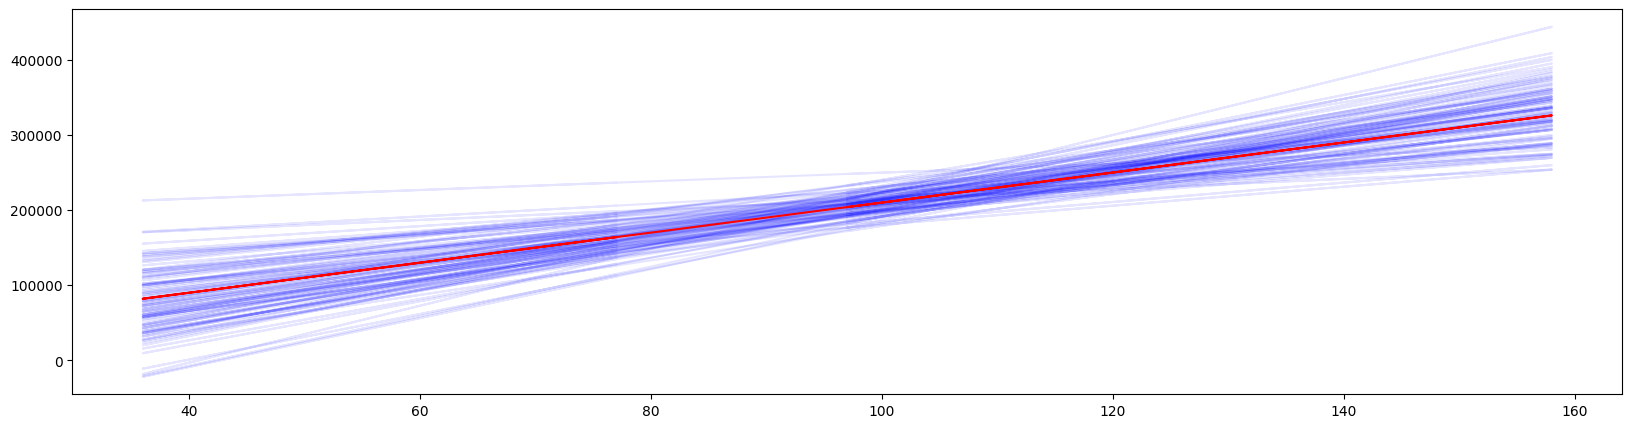

In [77]:
for i in range(100):
    # Tomamos una muesta de 30 departamentos
    df_muestra = df_poblacion.sample(30)
    # Entrenamos el modelo sobre la muestra
    model.fit(df_muestra[['superficies']],df_muestra['precios'])
    # Utilizamos al modelo para predecir los valores de todos los departamentos
    predicciones = model.predict(df_poblacion[['superficies']])
    # Graficamos cada una de las 100 regresiones
    plt.plot(df_poblacion['superficies'],predicciones,color='blue',alpha=0.1)

proceso_generador_perfecto = 10000 + df_poblacion['superficies'] * 2000
plt.plot(df_poblacion['superficies'],proceso_generador_perfecto,color='red')
plt.show()

## 100 es la media

Todas las regresiones son distintas, pero las predicciones se parecen mucho más alrededor de 100 que en los extremos ¿Recuerdan cuál era la superficie promedio de los departamentos en nuestra ciudad?


### Conclusión 1

Las predicciones son más precisas cerca del centroide de los datos que en los extremos. En otras palabras, nuestro modelo conoce bien lo que vio y más allá de eso, sólo puede hacer extrapolaciones cada vez más imprecisas.

¿Qué pasa si en lugar de 30, tomamos muestras más grandes? Es decir, aunque cueste más esfuerzo hacemos un relevamiento más exahustivo...

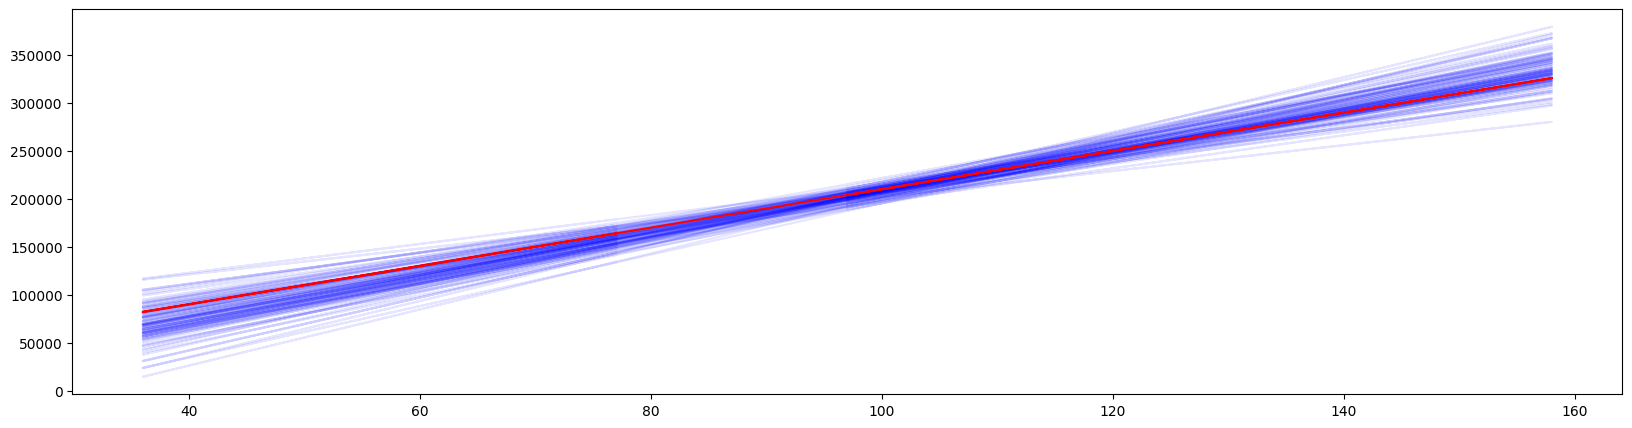

In [79]:
for i in range(100):
    # Ahora tomamos una muesta de 150 departamentos
    df_muestra = df_poblacion.sample(150)  ## muestras de 150 departamentos
    # Entrenamos el modelo sobre la muestra
    model.fit(df_muestra[['superficies']],df_muestra['precios'])
    # Utilizamos al modelo para predecir los valores de todos los departamentos
    predicciones = model.predict(df_poblacion[['superficies']])
    # Graficamos cada una de las 100 regresiones
    plt.plot(df_poblacion['superficies'],predicciones,color='blue',alpha=0.1)

proceso_generador_perfecto = 10000 + df_poblacion['superficies'] * 2000
plt.plot(df_poblacion['superficies'],proceso_generador_perfecto,color='red')
plt.show()

### Conclusión 2
Si tomamos muestras más grandes, las regresiones son todas más parecidas entre sí.

La interpretación estadística de esta incerteza en las predicciones, está dada por los intervalos de confianza.
Algunas librerías de Python permiten calcular los intervalos de confianza de un modelo. No es el caso de scikit learn porque esta librería está pensada para machine learning en general, no sólo para regresiones y busca crear una interfaz común para todos los modelos.

Para acceder a estimaciones estadísticas como los intervalos de confianza, en el próximo encuentro vamos a utilizar statsmodel.

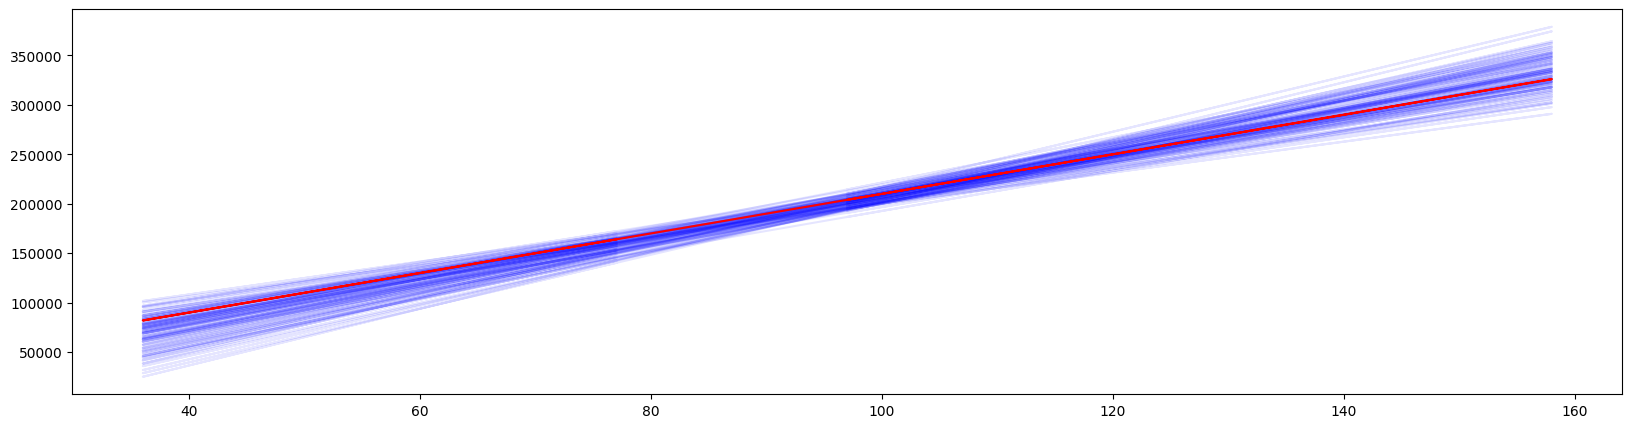

In [80]:
for i in range(100):
    # Ahora tomamos una muesta de 150 departamentos
    df_muestra = df_poblacion.sample(200)  ## muestras de 150 departamentos
    # Entrenamos el modelo sobre la muestra
    model.fit(df_muestra[['superficies']],df_muestra['precios'])
    # Utilizamos al modelo para predecir los valores de todos los departamentos
    predicciones = model.predict(df_poblacion[['superficies']])
    # Graficamos cada una de las 100 regresiones
    plt.plot(df_poblacion['superficies'],predicciones,color='blue',alpha=0.1)

proceso_generador_perfecto = 10000 + df_poblacion['superficies'] * 2000
plt.plot(df_poblacion['superficies'],proceso_generador_perfecto,color='red')
plt.show()